In [1]:
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# from itertools import permutations 
# a = [6,7,8,9,10,11,12,13]
# # no length entered so default length
# # taken as 4(the length of string GeEK)
# p = permutations(a,2) 
# # Print the obtained permutations 
# for j in list(p): 
#     ret, corners = cv2.findChessboardCorners(gray, j, None)
#     if ret:
#         print(j)

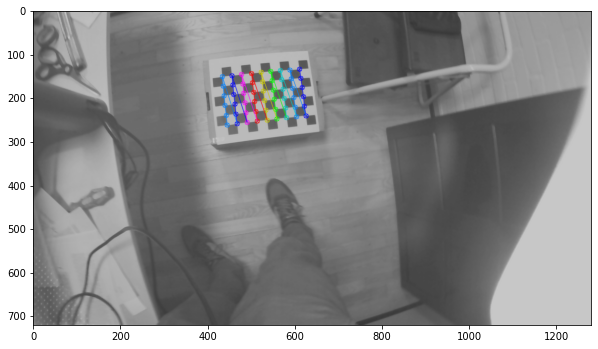

In [3]:
img_files = glob.glob('mynteye/left*')

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:9].T.reshape(-1,2)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Arrays to store object points and image points from all the images.
left_objpoints = [] # 3d point in real world space
left_imgpoints = [] # 2d points in image plane.

for fname in img_files:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (6,9), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        left_objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        left_imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (6,9), corners2, ret)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(left_objpoints, left_imgpoints, gray.shape[::-1], None, None)

In [5]:
left_ret, left_mtx, left_dist, left_rvecs, left_tvecs = ret, mtx, dist, rvecs, tvecs
img = cv2.imread(img_files[0])
h,  w = img.shape[:2]
left_newcameramtx,left_roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
left_newcameramtx,left_roi

(array([[270.27108765,   0.        , 580.53553083],
        [  0.        , 311.32443237, 345.23406831],
        [  0.        ,   0.        ,   1.        ]]),
 (342, 180, 492, 319))

In [6]:
np.savez('left.npz',left_mtx,left_dist,left_newcameramtx,left_roi)

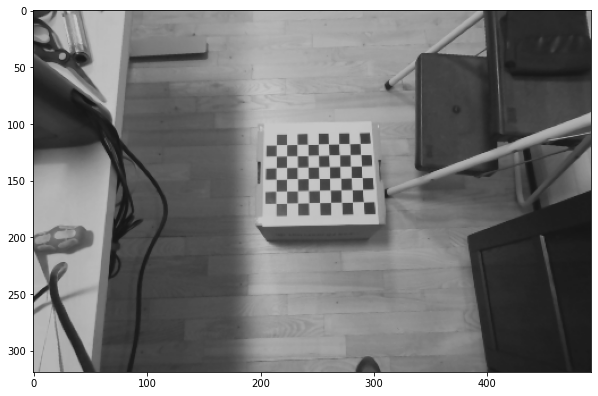

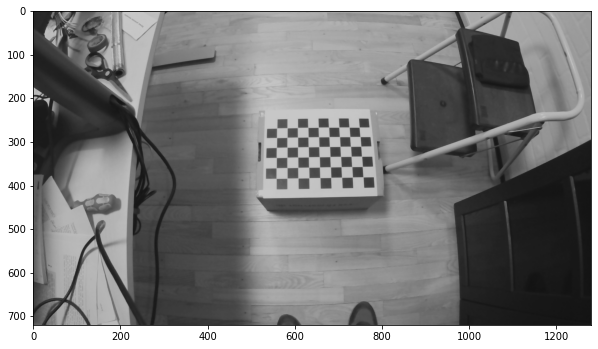

In [7]:
img = cv2.imread('mynteye/left-0000.png')
# undistort
dst = cv2.undistort(img, mtx, dist, None, left_newcameramtx)
# crop the image
x, y, w, h = left_roi
dst = dst[y:y+h, x:x+w]
plt.figure(1,figsize=(10,10))
plt.imshow(dst)
plt.figure(2,figsize=(10,10))
plt.imshow(img)

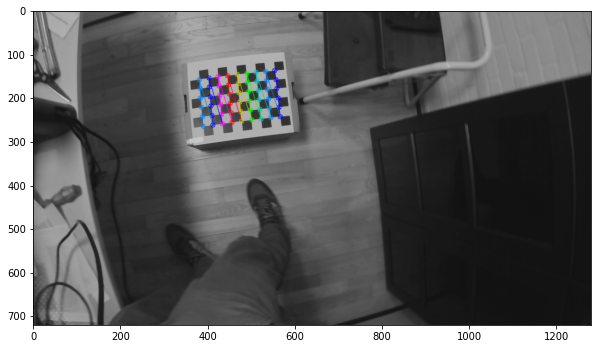

In [8]:
img_files = glob.glob('mynteye/right*')

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:9].T.reshape(-1,2)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Arrays to store object points and image points from all the images.
right_objpoints = [] # 3d point in real world space
right_imgpoints = [] # 2d points in image plane.

for fname in img_files:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (6,9), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        right_objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        right_imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (6,9), corners2, ret)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(right_objpoints, right_imgpoints, gray.shape[::-1], None, None)

In [10]:
right_ret, right_mtx, right_dist, right_rvecs, right_tvecs = ret, mtx, dist, rvecs, tvecs
img = cv2.imread(img_files[0])
h, w = img.shape[:2]
right_newcameramtx,right_roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
right_newcameramtx,right_roi

(array([[9.50433960e+01, 0.00000000e+00, 1.11016499e+03],
        [0.00000000e+00, 1.19804840e+02, 6.09264001e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 (1022, 545, 174, 123))

In [11]:
np.savez('right.npz',right_mtx,right_dist,right_newcameramtx,right_roi)

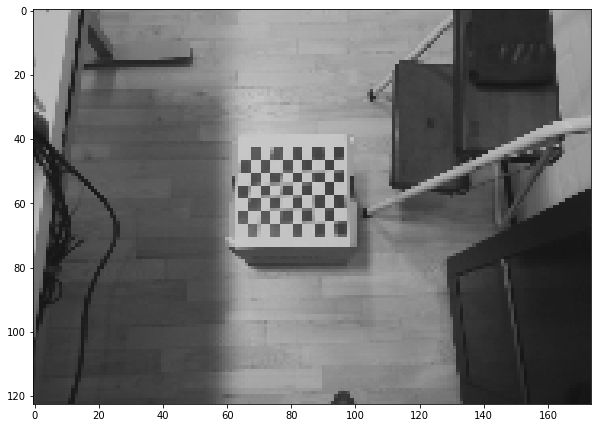

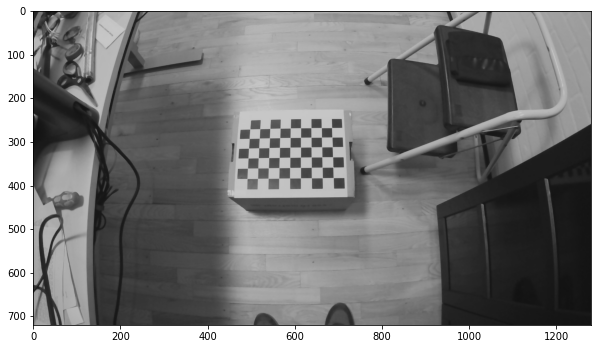

In [71]:
img = cv2.imread('mynteye/right-0000.png')
# undistort
undistorted = cv2.undistort(img, right_mtx, right_dist, None, right_newcameramtx)
# # crop the image
x, y, w, h = right_roi
undistorted = undistorted[y:y+h, x:x+w]
plt.figure(1,figsize=(10,10))
plt.imshow(undistorted)
plt.figure(2,figsize=(10,10))
plt.imshow(img)

In [72]:
h, w = img.shape[:2]

In [91]:
retval, cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, R, T, E, F = cv2.stereoCalibrate(right_objpoints, left_imgpoints, right_imgpoints, left_newcameramtx, left_dist, right_newcameramtx, right_dist, (w,h), flags=cv2.CALIB_USE_INTRINSIC_GUESS)

In [92]:
retval

25.087639521717787

In [83]:
R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = cv2.stereoRectify(cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, (w,h), R, T)

In [100]:
uh,uw = undistorted.shape[:2]
map11, map12 = cv2.initUndistortRectifyMap(cameraMatrix1, distCoeffs1, R1, P1, (uw,uh), cv2.CV_32FC1)
map21, map22 = cv2.initUndistortRectifyMap(cameraMatrix2, distCoeffs2, R2, P2, (uw,uh), cv2.CV_32FC1)

In [102]:
img1 = cv2.imread('mynteye/left-0000.png')
dst1 = cv2.remap(img1, map11, map12, cv2.INTER_LINEAR)
# dst1 = cv2.cvtColor(dst1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('mynteye/right-0000.png')
dst2 = cv2.remap(img2, map21, map22, cv2.INTER_LINEAR)
# dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2GRAY)

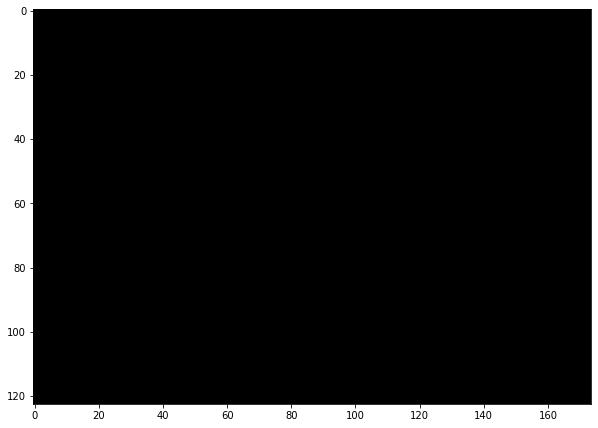

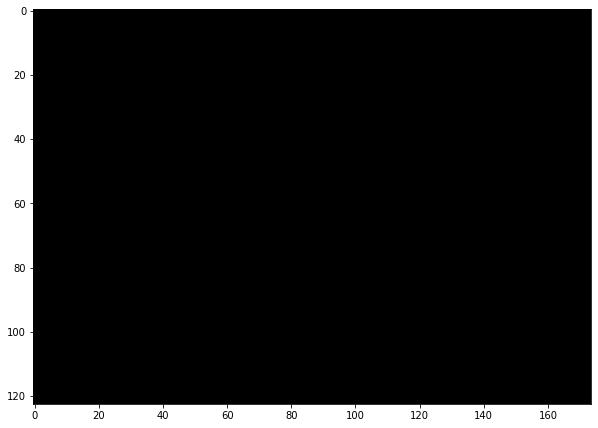

In [103]:
plt.figure(1,figsize=(10,10))
plt.imshow(dst1,cmap='gray')
plt.figure(2,figsize=(10,10))
plt.imshow(dst2,cmap='gray')

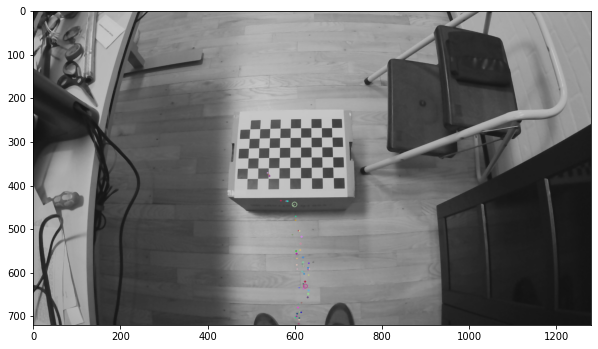

In [27]:
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(dst1, None)
kp2, des2 = sift.detectAndCompute(dst2, None)
kp_img = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,10))
plt.imshow(kp_img)
bf = cv2.BFMatcher()
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
nb_matches = 200
good = []
pts1 = []
pts2 = []
for m in matches[:nb_matches]:
    good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2)
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [28]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape[:2]
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,2)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

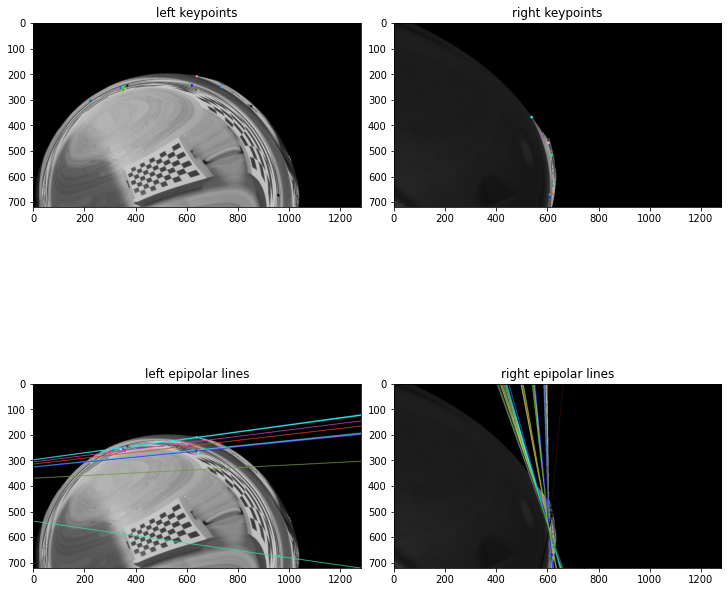

In [29]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2 ,F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(dst1, dst2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(dst2, dst1, lines2, pts2, pts1)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
axs[0, 0].imshow(img4)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img6)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img5)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img3)
axs[1, 1].set_title('right epipolar lines')
plt.show()

In [122]:
P = np.array([
    [725, 0, 631],
    [0, 726, 360],
    [0, 0, 1],
])
x = np.array([[1,1,4]]).T
x,P
scaled = P @ x
scaled = scaled/scaled[-1]
scaled

array([[812.25],
       [541.5 ],
       [  1.  ]])

In [111]:
np.sqrt(5**2 * 3 + 20**2 + 15**2 + 10**2)

28.284271247461902